In [1]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

file_path = 'fnb_datav2.csv'

# Read Excel file
data = pd.read_csv(file_path)

# Access data
#print(excel_data.head())  # Assuming you want to print first few rows
display(data)

,idcol,interaction,int_date,item,page,tod,item_type,item_descrip,segment,beh_segment,active_ind
0,755,DISPLAY,17JAN2023,NONE,Screen1,Afternoon,ALL,NaN,segment3,B01,Semi Active
1,4521,DISPLAY,27FEB2023,NONE,Screen1,Afternoon,ALL,NaN,segment1,B07,Semi Active
2,4521,DISPLAY,18FEB2023,NONE,Screen1,Afternoon,ALL,NaN,segment1,B07,Semi Active
3,4521,DISPLAY,30JAN2023,NONE,Screen1,Morning,ALL,NaN,segment1,B07,Semi Active
4,4521,CLICK,05FEB2023,IBAB,Screen1,Afternoon,INSURE,GENERIC MESSAGE,segment1,B07,Semi Active
...,...,...,...,...,...,...,...,...,...,...,...
399995,25728632418,CHECKOUT,19FEB2023,FIWL,Screen1,Evening,INVEST,FNB FIDUCIARY WILLS,segment1,B27,Cold Start
399996,25728632418,CHECKOUT,01FEB2023,FIWL,Screen1,Evening,INVEST,FNB FIDUCIARY WILLS,segment1,B27,Cold Start
399997,25728632418,CLICK,05MAR2023,EVCU,Screen1,Afternoon,TRANSACT,E-VIRTUAL CARD UTILITY,segment1,B27,Cold Start
399998,25728632418,CLICK,30MAR2023,CBEL,Screen1,Early,CONNECT,PREPAID ELECTRICITY,segment1,B27,Cold Start


Pivot to wide data format: (All items for each id)

In [2]:
# Pivot the DataFrame from long to wide format
wide_data = data.pivot_table(index=['idcol'], columns=['item'], aggfunc='size', fill_value=0)

# Reset the index to make 'segment' a column again (optional)
wide_data.reset_index(inplace=True)

# Rename the index column
wide_data.rename_axis(None, axis=1, inplace=True)

# Display the wide-format data
display(wide_data)

,idcol,CABC,CACU,CAFB,CAFI,CAFM,CAFS,CAFU,CALI,CANL,...,MMMC,MMSM,NACS,NAFW,NASD,NATR,NONE,SEVP,WHCR,XCFL
0,755,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,4521,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
2,6145,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
3,7125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8469,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84370,25685663618,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,1
84371,25693117918,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
84372,25705258018,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
84373,25721743718,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Explore data per segment:

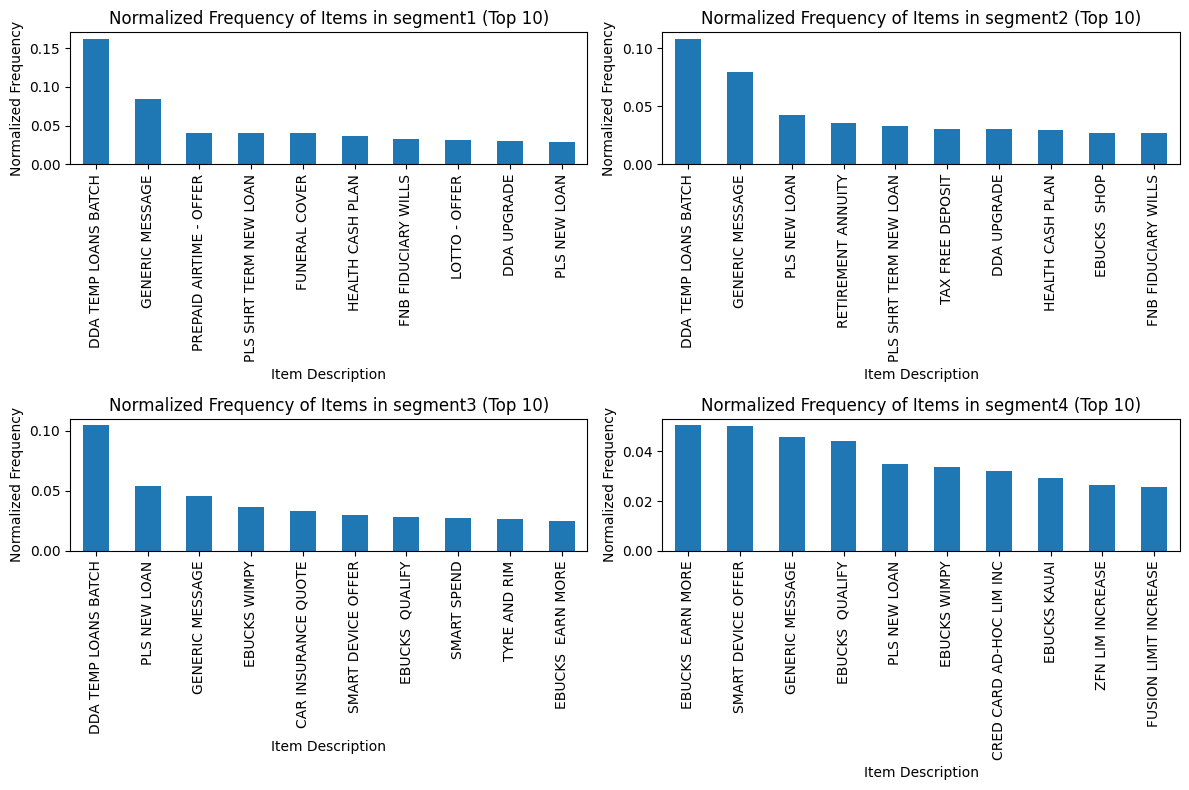

In [3]:
# Sort unique segment values in ascending order
sorted_segments = sorted(data['segment'].unique())

# Create a figure and axis objects for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Iterate over sorted segments and corresponding subplot axes
for segment, ax in zip(sorted_segments, axs.flatten()):
    # Filter the data to include only rows where 'segment' is equal to the current segment
    segment_data = data[data['segment'] == segment]
    
    # Calculate the frequency of each 'item_descrip' for the segment
    item_descrip_counts = segment_data['item_descrip'].value_counts()
    
    # Get the top 10 'item_descrip' based on the total frequency
    top_10_item_descrip = item_descrip_counts.nlargest(10).index
    
    # Filter the item_descrip_counts series to include only the top 10 'item_descrip'
    top_10_item_counts = item_descrip_counts.loc[top_10_item_descrip]
    
    # Calculate the total count of all 'item_descrip' entries for the segment
    total_item_descrip_count = segment_data['item_descrip'].count()
    
    # Normalize the frequency of each 'item_descrip' by the total number of all 'item_descrip' entries for the segment
    normalized_top_10_item_counts = top_10_item_counts.div(total_item_descrip_count)
    
    # Plot the normalized frequency of 'item_descrip' for the top 10 'item_descrip' for the current segment
    normalized_top_10_item_counts.plot(kind='bar', ax=ax)
    ax.set_xlabel('Item Description')
    ax.set_ylabel('Normalized Frequency')
    ax.set_title(f'Normalized Frequency of Items in {segment} (Top 10)')

plt.tight_layout()
plt.show()

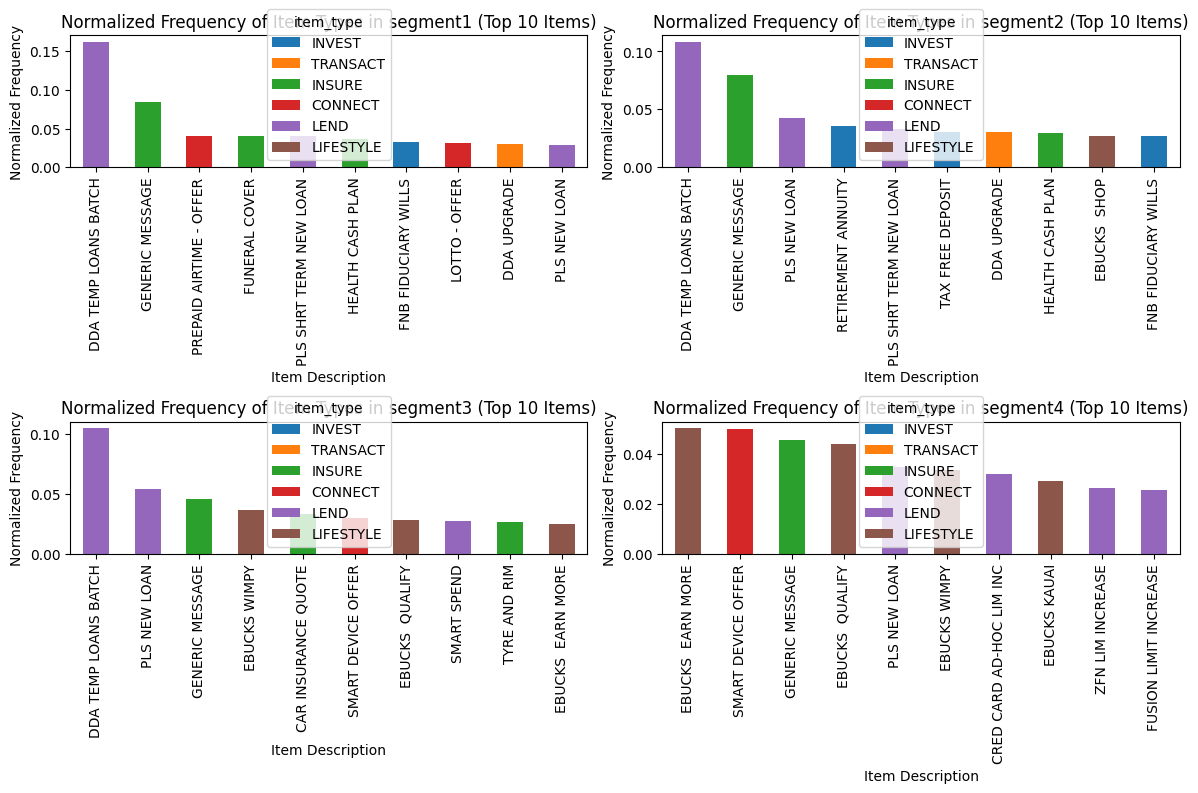

In [4]:
# Sort unique segment values in ascending order
sorted_segments = sorted(data['segment'].unique())

# Create a figure and axis objects for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Iterate over sorted segments and corresponding subplot axes
for segment, ax in zip(sorted_segments, axs.flatten()):
    # Filter the data to include only rows where 'segment' is equal to the current segment
    segment_data = data[data['segment'] == segment]
    
    # Group the filtered data by 'item_descrip' and 'item_type' and calculate the frequency of each 'item_type' within each 'item_descrip'
    item_counts = segment_data.groupby(['item_descrip', 'item_type']).size().unstack()
    
    # Get the top 10 'item_descrip' based on the total frequency
    top_10_item_descrip = item_counts.sum(axis=1).nlargest(10).index
    
    # Filter the item_counts dataframe to include only the top 10 'item_descrip'
    top_10_item_counts = item_counts.loc[top_10_item_descrip]
    
    # Calculate the total count of all 'item_descrip' entries for the segment
    total_item_descrip_count = segment_data['item_descrip'].count()
    
    # Normalize the frequency of each 'item_type' within the top 10 'item_descrip' by the total number of all 'item_descrip' entries for the segment
    normalized_top_10_item_counts = top_10_item_counts.div(total_item_descrip_count)
    
    # Plot the normalized frequency of 'item_type' for the top 10 'item_descrip' for the current segment
    normalized_top_10_item_counts.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel('Item Description')
    ax.set_ylabel('Normalized Frequency')
    ax.set_title(f'Normalized Frequency of Item Types in {segment} (Top 10 Items)')
    #ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


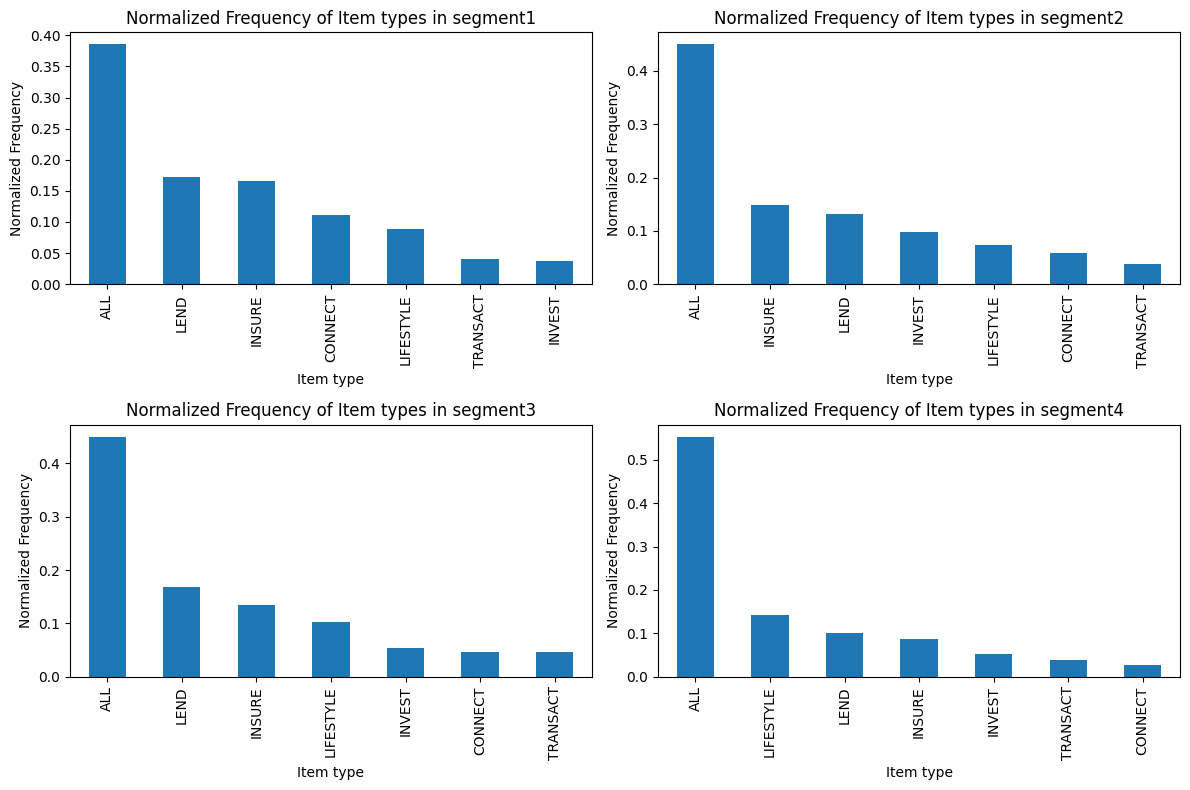

40318


In [9]:
# Sort unique segment values in ascending order
sorted_segments = sorted(data['segment'].unique())

# Create a figure and axis objects for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Iterate over sorted segments and corresponding subplot axes
for segment, ax in zip(sorted_segments, axs.flatten()):
    # Filter the data to include only rows where 'segment' is equal to the current segment
    segment_data = data[data['segment'] == segment]
    
    # Calculate the frequency of each 'item_descrip' for the segment
    item_type_counts = segment_data['item_type'].value_counts()
        
    # Calculate the total count of all 'item_descrip' entries for the segment
    total_item_count = segment_data['item'].count()
    
    # Normalize the frequency of each 'item_descrip' by the total number of all 'item_descrip' entries for the segment
    normalized_item_types = item_type_counts.div(total_item_count)
    
    # Plot the normalized frequency of 'item_descrip' for the top 10 'item_descrip' for the current segment
    normalized_item_types.plot(kind='bar', ax=ax)
    ax.set_xlabel('Item type')
    ax.set_ylabel('Normalized Frequency')
    ax.set_title(f'Normalized Frequency of Item types in {segment}')

plt.tight_layout()
plt.show()


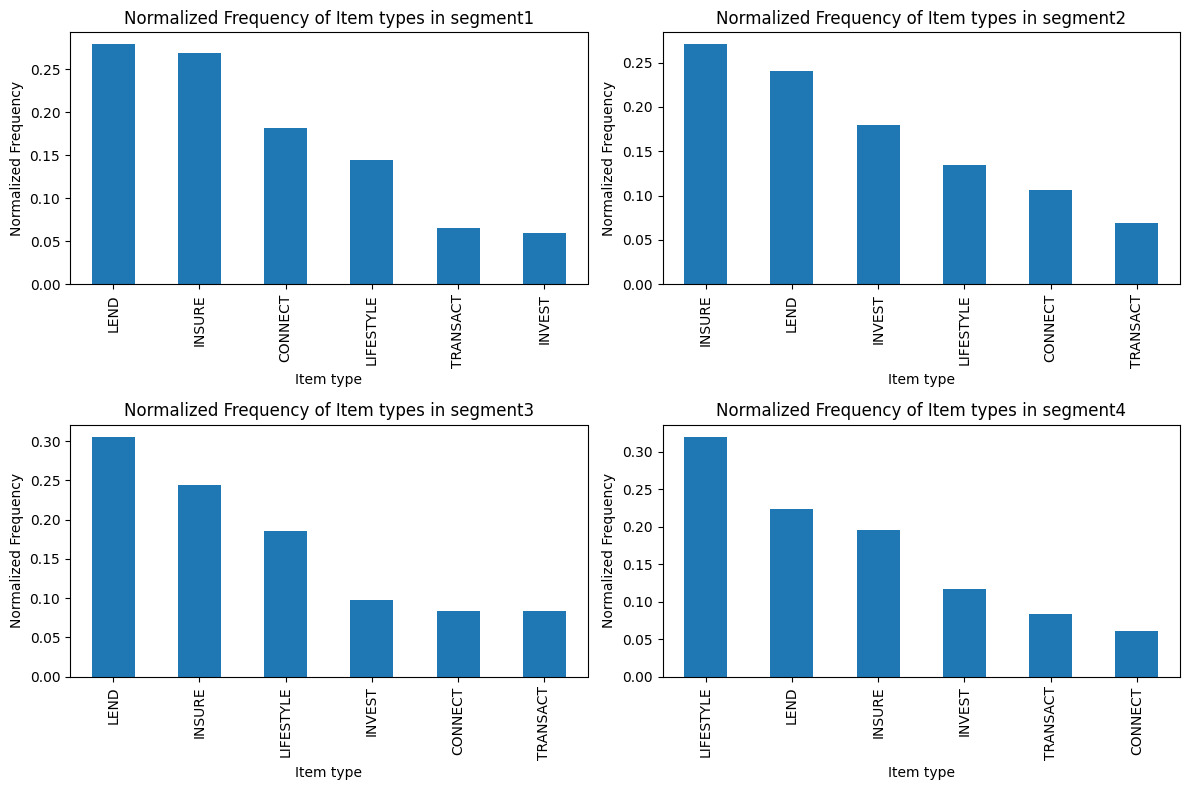

item_type
LIFESTYLE    5762
LEND         4032
INSURE       3518
INVEST       2101
TRANSACT     1510
CONNECT      1095
Name: count, dtype: int64


In [8]:
#REMOVE 'ALL' ROWS
# Sort unique segment values in ascending order
sorted_segments = sorted(data['segment'].unique())

# Create a figure and axis objects for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Iterate over sorted segments and corresponding subplot axes
for segment, ax in zip(sorted_segments, axs.flatten()):
    # Filter the data to include only rows where 'segment' is equal to the current segment and item_type is not 'ALL'
    segment_data = data[(data['segment'] == segment) & (data['item_type'] != 'ALL')]
    
    # Calculate the frequency of each 'item_type' for the segment
    item_type_counts = segment_data['item_type'].value_counts()
        
    # Calculate the total count of all 'item_type' entries for the segment
    total_item_count = segment_data.shape[0]  # Count the rows in segment_data DataFrame
    
    # Normalize the frequency of each 'item_type' by the total number of all 'item_type' entries for the segment
    normalized_item_types = item_type_counts.div(total_item_count)
    
    # Plot the normalized frequency of 'item_type' for the current segment
    normalized_item_types.plot(kind='bar', ax=ax)
    ax.set_xlabel('Item type')
    ax.set_ylabel('Normalized Frequency')
    ax.set_title(f'Normalized Frequency of Item types in {segment}')

plt.tight_layout()
plt.show()


In [11]:
#overview
item_type_counts = data['item_type'].value_counts()
print(item_type_counts)
item_counts = data['item'].value_counts()
print(item_counts)

item_type
ALL          173638
LEND          62036
INSURE        58043
LIFESTYLE     37982
CONNECT       29369
INVEST        22452
TRANSACT      16480
Name: count, dtype: int64
item
NONE    173638
CTLN     28177
CUPL      8786
IBAA      8771
IBAB      6990
         ...  
FIWR        48
IPST        30
IPFN        19
IPMX        13
IPSD         4
Name: count, Length: 104, dtype: int64


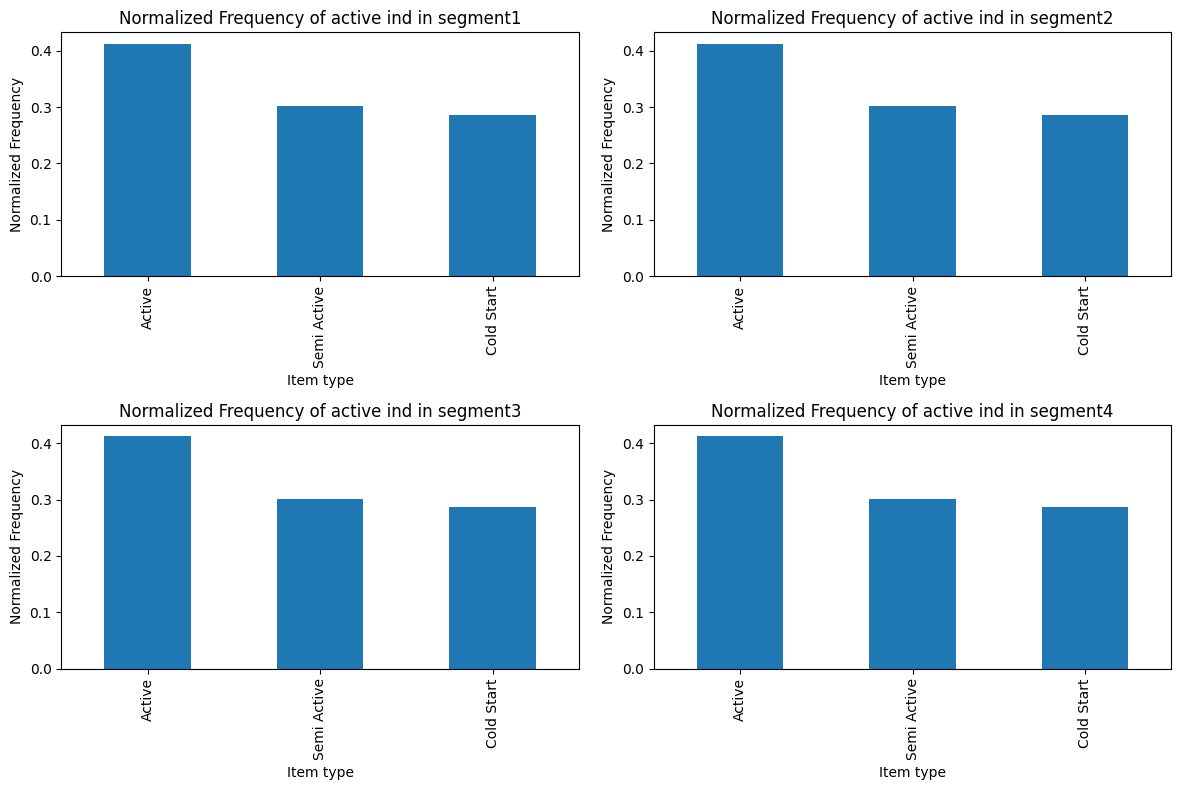

In [13]:
# Create a figure and axis objects for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Iterate over sorted segments and corresponding subplot axes
for segment, ax in zip(sorted_segments, axs.flatten()):
    
    # Calculate the frequency of each 'item_type' for the segment
    active_counts = segment_data['active_ind'].value_counts()
        
    # Calculate the total count of all 'item_type' entries for the segment
    total_item_count = segment_data.shape[0]  # Count the rows in segment_data DataFrame
    
    # Normalize the frequency of each 'item_type' by the total number of all 'item_type' entries for the segment
    normalized_active = active_counts.div(total_item_count)
    
    # Plot the normalized frequency of 'item_type' for the current segment
    normalized_active.plot(kind='bar', ax=ax)
    ax.set_xlabel('Item type')
    ax.set_ylabel('Normalized Frequency')
    ax.set_title(f'Normalized Frequency of active ind in {segment}')

plt.tight_layout()
plt.show()
